# Korrelationstest

... für ein 2-dimensional normalverteilts Merkmal. Der hier vorgestellte Test ist ein Parametertest. 

Hier möchten wir Hypothesen Testen, welche die Größe des Korrelationskoeffizienten zweier Merkmale betreffen.
Damit der Test anwendbar ist müssen die Merkmale 2-dimensional (bivariat) normalverteilt sein. Was dies bedeutet wollen wir hier kurz erklären. Für ausführlichere Informationen sei auf die Literatur verwiesen.

## Was ist ein 2-dimensional normalverteiltes Merkmal?

Bisher kennen wir die **Normalverteilung** für ein einzelnes Merkmal, also für eine Zufallsvariable $X \sim \mathrm{N}(\mu, \sigma^2)$. In vielen Anwendungen interessiert man sich jedoch für **zwei** Merkmale gleichzeitig, z. B.:

- Größe und Gewicht von Personen  
- Lernzeit und Prüfungsleistung  
- Geschwindigkeit und Bremsweg  

In solchen Fällen betrachtet man zwei Zufallsvariablen $X$ und $Y$, die gemeinsam verteilt sind. Um eine stetige 2-dimensionale Verteilung zu definieren, gibt man oft (wie auch im eindimensionalen) die Dichtefunktion an. Diese lautet für die 2-dimensionale Normalverteilung (auch bivariate Normalverteilung genannt):

$$
f:\mathbb{R}^2 \to\mathbb R, \qquad f(x,y) = \frac{1}{\sqrt{(2\pi)^2 \det(\Sigma)}}\cdot \exp\left(-\frac12 \left(\begin{pmatrix}x\\y\end{pmatrix}-\begin{pmatrix}\mu_X\\ \mu_Y\end{pmatrix}\right)^\top \Sigma^{-1} \left(\begin{pmatrix}x\\y\end{pmatrix} -\begin{pmatrix}\mu_X\\ \mu_Y\end{pmatrix}\right)\right)
$$

Man schreibt dann

$$
(X, Y) \sim \mathcal{N}_2\left( \begin{pmatrix} \mu_X \\ \mu_Y \end{pmatrix}, \begin{pmatrix} \mathrm{Var}(X) & \mathrm{Cov}(X,Y) \\ \mathrm{Cov}(X,Y) & \mathrm{Var}(Y) \end{pmatrix} \right)
$$

Dabei:
- $\mu_X, \mu_Y$ sind die Erwartungswerte der beiden Merkmale
- $\mathrm{Var}(X), \mathrm{Var}(Y)$ sind die Varianzen.
- $\mathrm{Cov}(X,Y)$ ist die Kovarianz zwischen $X$ und $Y$.
- $\mu:=\begin{pmatrix} \mu_X \\ \mu_Y \end{pmatrix}$ heißt **Erwartungswertvektor**
- $\Sigma:=\begin{pmatrix} \mathrm{Var}(X) & \mathrm{Cov}(X,Y) \\ \mathrm{Cov}(X,Y) & \mathrm{Var}(Y) \end{pmatrix}$ heißt **Kovarianzmatrix**

**Anschaulich:** Die Form der Dichte in Abhängigkeit der Parameter ist hier in Geogebra dargestellt:

<iframe scrolling="no" title="Bivariate Normal Distribution" src="https://www.geogebra.org/material/iframe/id/b3fk3aty/width/780/height/350/border/888888/sfsb/true/smb/false/stb/false/stbh/false/ai/false/asb/false/sri/true/rc/false/ld/false/sdz/true/ctl/false" width="780px" height="350px" style="border:0px;"> </iframe>

:::{admonition} Satz
:class: satz

Sind $X$ und $Y$ zusammen 2-dimensional normalverteilt mit Erwartungswertvektor $\mu=\begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix}$ und Kovarianzmatrix $\Sigma= \begin{pmatrix} a & c \\ c & b\end{pmatrix}$, so gilt
- $X$ ist (eindimensional) normalverteilt: $X\sim \mathrm{N}(\mu_1, a)$
- $Y$ ist (eindimensional) normalverteilt: $Y\sim \mathrm{N}(\mu_2, b)$

:::

**Beachte:**  Die Rückrichtung gilt im Allgemeinen nicht, d.h. es gibt normalvereilte Zufallsvariablen $X$ und $Y$, welche nicht gemeinsam 2-dimensional normalverteilt sind.

## Voraussetzungen und Vorgehensweise

Bei der Durchführung des Tests halten wir uns and die bekannte [Vorgehenweise](sec:vorgehensweise.test). Im Folgenden werden die  zugehörigen konkreten Hypothesen, Testgrößen, kritischen Bereiche und p-Werte besprochen.

Es liege eine Stichprobe eines 2-dimensionalen normalverteilten Merkmals $(X, Y)$ vor. Die Stichproben zu $X$ und $Y$ haben daher die gleiche Größe. Wir sprechen in diesem Fall von **verbundenen Stichproben** da zu jedem $x$-Wert der Stichprobe der entsprechende $y$-Wert der Stichprobe gehört.

Ziel ist es, Hypothesen über die **Stärke der Korrelation** zwischen $X$ und $Y$ zu testen. Es wird mit dem **Korrelationskoeffizienten** gearbeitet, d.h. es wird auf **linearen Zusammenhang** geprüft.

**Beispielhafte Fragestellungen:**
- Gibt es einen (linearen) Zusammenhang zwischen Alter und Intelligenzquotient?
- Gibt es einen positiven linearen Zusammenhang zwischen Anzahl der erledigten Hausaufgaben und der erreichten Punktzahl?

---

## Testgröße

Seien $X$ und $Y$ bivariat normalverteilte Merkmale mit Stichproben $X_1, ..., X_n$ und $Y_1, ..., Y_n$. Sei $\rho$ der Korrelationskoeffizient und $R$ der Stichprobenkorrelationskoeffizient.

Die Testgröße ist jeweils:

$$
T=\frac{R\sqrt{n-2}}{\sqrt{1-R^2}}
$$

mit Umsetzung in R:

```R

t <- (r * sqrt(n - 2)) / sqrt(1 - r^2)

```

---

## Hypothesen und kritischer Bereich

Wie der kritische Bereich zur jeweiligen Hypothese gewählt wird erkennt man hier:

| $H_0$      | $H_1$         | Kritischer Bereich $K$                 |
| ---------- | ------------- | -------------------------------------------------------------------- |
| $\rho = 0$ | $\rho \neq 0$ | $(-\infty, -t_{n-2, 1-\frac{\alpha}{2}}) \cup (t_{n-2, 1-\frac{\alpha}{2}}, \infty)$ |
| $\rho \leq 0$ | $\rho > 0$ | $(t_{n-2, 1-\alpha}, \infty)$ |
| $\rho \geq 0$ | $\rho < 0$ | $(-\infty, -t_{n-2, 1-\alpha})$ |

hier ist mit $t_{n-2, 1-\alpha})$ das $(1-\alpha)$-Quantil der t-Verteilung mit $n-2$ Freiheitsgraden gemeint.

---

## p-Wert

Wie man den p-Wert zur jeweiligen Hypothese berechnet erkennt man hier:


| $H_0$      | $H_1$         | p-Wert                | p-Wert in R |
| ---------- | ------------- | --------------------- |---|
| $\rho = 0$ | $\rho \neq 0$ | $2\cdot (1- F_{t(n-2)}(\vert t\vert )$ | `2*(1-pt(abs(t), df=n-2))`
| $\rho \leq 0$ | $\rho > 0$ | $1- F_{t(n-2)}(t)$ | `1-pt(t, df=n-2)`  |
| $\rho \geq 0$ | $\rho < 0$ | $F_{t(n-2)}(t)$ |  `pt(t, df=n-2)` |


Alternativ zu den hier beschriebenen R-Befehlen, lässt sich der Korrelationtest auch mit der Funktion `cor.test(...)` rechnen, siehe unten.

---


## Beispiel

Im Datensatz `cars` in R sind die Merkmale `speed` und `dist` vorhanden. Sie beschreiben die Messungen eines Bremswegs `dist` bei Ausgangsgeschwindigkeit `speed`.

Es ist zum Signifikanzniveau $0.05$ zu prüfen ob eine positive Korrelation vorliegt. Wir setzen voraus, dass die Daten bivariat normalverteilt sind.

Der Datensatz sieht wie folgt aus:

speed dist
1 4      2  
2 4     10  
3 7      4  
4 7     22  
5 8     16  
6 9     10

[1] 50  2

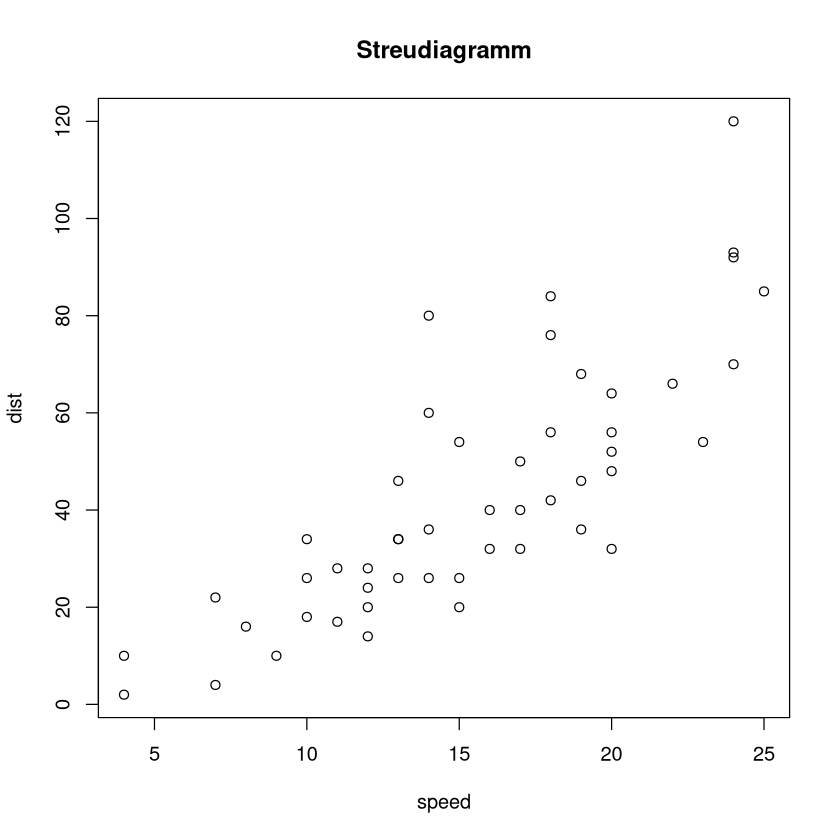

In [4]:
head(cars)
dim(cars)
plot(cars,main="Streudiagramm")

Es gilt also $n=50$. Der konkrete Stichprobenkorrelationskoeffizient $r$ lässt sich mit `cor(cars$speed,cars$dist)` berechnen:

In [5]:
cor(cars$speed,cars$dist)

[1] 0.8068949

Bezeichnungen:

- $X$ ... Geschwingkeit in mph

- $Y$ ... Bremsweg in ft

- $\rho$ ist der Korrelationskoeffizient von $X$ und $Y$

Wir gehen nun in der üblichen Reihenfolge vor:

1. **Signifikanzniveau:** $\alpha=0.05$
2. **Hypothesen:** $H_0: \rho\leq 0$, $\quad H_1:\rho >0$
3. **Konkrete Testgröße:** $t=\frac{r\sqrt{n-2}}{\sqrt{1-r^2}} = \frac{0.80689 \cdot \sqrt{48}}{\sqrt{1-0.80689^2}}\approx 9.46$
4. **Kritischer Bereich:** $K= (t_{n-2, 1-\alpha}, \infty) = (1.6772, \infty)$
5. **Entscheidung:** $t\in K$, daher wird $H_0$ verworfen
6. **Interpretation:** Auf Grundlage der vorliegenden Daten gehen wir nach einem Test zum Signifikanzniveau $0.05$ davon aus, dass eine positive Korrelation zwischen Bremsweg und Ausgangsgeschwindigkeit vorliegt.

Wir zeigen noch die **Umsetzung in R**:

In [11]:
# Stichprobengröße:
n <- dim(cars)[1]
# Korrelationskoeffizient der Stichprobe:
r <- cor(cars$speed,cars$dist)
# Testgröße
t <- (r * sqrt(n - 2)) / sqrt(1 - r^2)
t
# Grenze des kritischen Bereichs:
qt(0.95,48)

[1] 9.46399

[1] 1.677224

Alternative Weg unter Verwendung des p-Werts:


1. **Signifikanzniveau:** $\alpha=0.05$
2. **Hypothesen:** $H_0: \rho\leq 0$, $\quad H_1:\rho >0$
3. **Konkrete Testgröße:** $t=\frac{r\sqrt{n-2}}{\sqrt{1-r^2}} = \frac{0.80689 \cdot \sqrt{48}}{\sqrt{1-0.80689^2}}\approx 9.46$
4. **p-Wert:** $1-F_{t(n-2)(0.80689)}=1-0.999999999999245$
5. **Entscheidung:** p-Wert$<\alpha$, daher wird $H_0$ verworfen
6. **Interpretation:** Auf Grundlage der vorliegenden Daten gehen wir nach einem Test zum Signifikanzniveau $0.05$ davon aus, dass eine positive Korrelation zwischen Bremsweg und Ausgangsgeschwindigkeit vorliegt.

Umsetzung in R

In [18]:
# Variante 1

# Stichprobengröße:
n <- dim(cars)[1]
# Korrelationskoeffizient der Stichprobe:
r <- cor(cars$speed,cars$dist)
# Testgröße
t <- (r * sqrt(n - 2)) / sqrt(1 - r^2)
# Grenze des kritischen Bereichs:
1-pt(t,n-2)

[1] 7.449596e-13

In [19]:
# Variante 2
cor.test(cars$speed,cars$dist, alternative = "greater", method = "pearson")


	Pearson's product-moment correlation

data:  cars$speed and cars$dist
t = 9.464, df = 48, p-value = 7.449e-13
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.7054856 1.0000000
sample estimates:
      cor 
0.8068949 


Erläuterung zum Befehl `cor.test`:
- `alternative=...` legt die Alternativhypothese fest (mögliche Werte: "greater", "less", "two.sided")
- `method="pearson"` wählt den richtigen Korrelationstest aus (es gibt noch andere Typen, welche wir hier nicht behandeln)

## Korrelation vs. Kausalität

Wie bereits am Beispiel des `cars`-Datensatzes gezeigt, lässt sich eine positive Korrelation zwischen der Geschwindigkeit eines Fahrzeugs (`speed`) und dem Bremsweg (`dist`) feststellen. In diesem Fall erscheint eine **kausale Interpretation** sinnvoll: Physikalisch ist nachvollziehbar, dass höhere Geschwindigkeiten längere Bremswege bedingen.

Doch nicht jede Korrelation ist auch kausal begründet. Um dies zu verdeutlichen, betrachten wir ein weiteres Beispiel: Die Anzahl an jährlich veröffentlichten Disney-Filmen im Vergleich zur Scheidungsrate im Vereinigten Königreich. 


| Kategorie         | 2010   | 2011   | 2012   | 2013   | 2014   | 2015   | 2016   | 2017   | 2018   | 2019   | 2020   | 2021   | 2022   |
|------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| Scheidungen (UK) | 141135 | 143818 | 147735 | 153065 | 152923 | 141322 | 132140 | 128131 | 121708 | 113949 | 119589 | 117558 | 118140 |
| Disney-Filme     | 33     | 29     | 32     | 37     | 33     | 24     | 20     | 21     | 16     | 19     | 10     | 11     | 12     |


Auch hier lässt sich eine hohe Korrelation ($r=0.9251$) feststellen – doch eine inhaltliche Verbindung beider Größen ist mit hoher Sicherheit reiner Zufall.

Schauen wir uns dazu Grafiken und den Korrelationstest an:


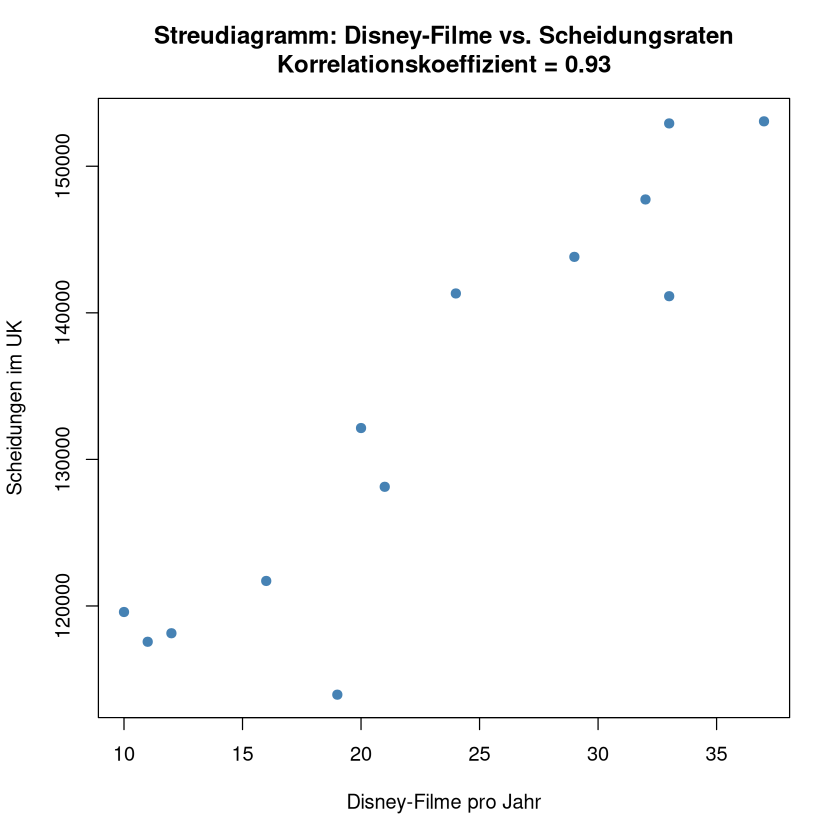


	Pearson's product-moment correlation

data:  divorces and disney_movies
t = 8.0812, df = 11, p-value = 5.933e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7631109 0.9777291
sample estimates:
      cor 
0.9251183 



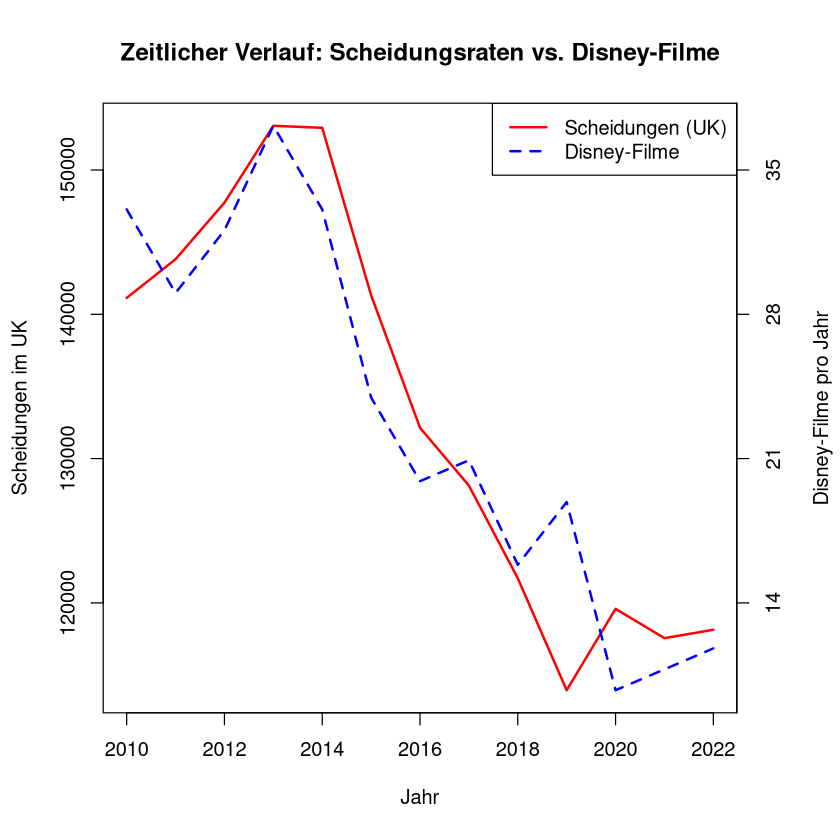

In [2]:
# Beispiel-Daten
divorces <- c(141135,143818,147735,153065,152923,141322,132140,128131,121708,113949,119589,117558,118140)
disney_movies <- c(33,29,32,37,33,24,20,21,16,19,10,11,12)
years <- 2010:2022

# Korrelation berechnen
correlation <- cor(divorces, disney_movies)
cor_test <- cor.test(divorces, disney_movies)

# Reskalierung der Disney-Daten für optische Überlagerung
scale_factor <- (max(divorces) - min(divorces)) / (max(disney_movies) - min(disney_movies))
disney_scaled <- disney_movies * scale_factor + (min(divorces) - min(disney_movies) * scale_factor)

# Streudiagramm
plot(disney_movies, divorces,
     main = paste("Streudiagramm: Disney-Filme vs. Scheidungsraten\nKorrelationskoeffizient =", round(correlation, 2)),
     xlab = "Disney-Filme pro Jahr", ylab = "Scheidungen im UK", pch = 19, col = "steelblue")

# Plot mit zwei Achsen
par(mar = c(5, 4, 4, 4) + 0.3)  # extra Platz rechts für zweite Achse

# Plot 1: Scheidungsraten (linke Achse)
plot(years, divorces, type = "l", col = "red", lwd = 2,
     xlab = "Jahr", ylab = "Scheidungen im UK",
     main = "Zeitlicher Verlauf: Scheidungsraten vs. Disney-Filme")

# Plot 2: Disney-Filme (rechte Achse), skaliert
lines(years, disney_scaled, col = "blue", lwd = 2, lty = 2)

# Rechte Achse hinzufügen
axis(side = 4, at = pretty(disney_scaled),
     labels = round((pretty(disney_scaled) - (min(divorces) - min(disney_movies) * scale_factor)) / scale_factor))
mtext("Disney-Filme pro Jahr", side = 4, line = 3)

# Legende
legend("topright", legend = c("Scheidungen (UK)", "Disney-Filme"),
       col = c("red", "blue"), lty = c(1, 2), lwd = 2)

#Korrelationstest anzeigen
print(cor_test)



**Interpretation:**

Obwohl der Korrelationskoeffizient in diesem Fall einen starken positiven Zusammenhang zeigt (welcher auch durch den Test bestätigt wird), ist die Schlussfolgerung einer Kausalität nicht gerechtfertigt. Es handelt sich um einen statistischen Zusammenhang, der mit hoher Wahrscheinlichkeit durch Zufall entstanden ist. 

Neben solchen rein zufällig entstandenen Korrelationen, gibt es auch Merkmale, die eine starke Korrelation aufweisen, welche sich aber nicht gegenseitig bedingen. Vielmehr werden die Merkmale durch eine gemeinsame dritte Ursache beeinflusst. 

**Beispiel:** Paul und Emma tragen oft am selben Tag beide kurze T-Shirts oder beide lange Pullover. Es liegt einen hohe Korrelation vor. Jedoch orientiert sich weder Paul an Emma noch Emma an Paul bei der Wahl der Kleidung. Es gibt keine Kausalität zwischen beiden. Aber es gibt hier eine dritte Größe, nämlich das Wetter, welche beide anderen Größen beeinflusst.

**Fazit:**

Die Korrelation ist ein hilfreiches Werkzeug zur Beschreibung von linearen Zusammenhängen zwischen zwei Variablen. Doch sie ist jedoch kein Beweis für Kausalität. In der Forschung und Datenanalyse ist es daher unerlässlich, Korrelationen kritisch zu hinterfragen, insbesondere wenn der Zusammenhang inhaltlich fragwürdig erscheint oder keine theoretische Begründung vorliegt.


```{figure} https://imgs.xkcd.com/comics/correlation.png
---
width: 450px
name: directive-fig
---
Korrelation vs. Kausalität (Quelle: xkcd.com)
```

:::{admonition} Merke
:class: warning


Eine hohe Korrelation kann ein interessanter Hinweis sein – aber erst fundierte theoretische Überlegungen oder kontrollierte Studien erlauben Aussagen über Ursache und Wirkung.


:::


